# 6. Quiz

## 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [4]:
dataset = pd.read_csv('data/QuizData.csv')

In [72]:
dataset.head()

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [59]:
total = dataset.iloc[:, :-1].values
reception = dataset.iloc[:, -1].values

total, reception

(array([[118],
        [253],
        [320],
        [ 94],
        [155],
        [188],
        [201],
        [338],
        [186],
        [183],
        [223],
        [392],
        [ 86],
        [112],
        [129],
        [223],
        [288],
        [262],
        [143],
        [179]], dtype=int64),
 array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
         68,  76, 149, 152, 183,  88, 101], dtype=int64))

## 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 로 합니다.

(단, random_state = 0 으로 설정)

In [60]:
from sklearn.model_selection import train_test_split
total_train, total_test, reception_train, reception_test = train_test_split(total, reception, test_size=0.25, random_state=0)

## 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(total_train, reception_train)

LinearRegression()

## 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

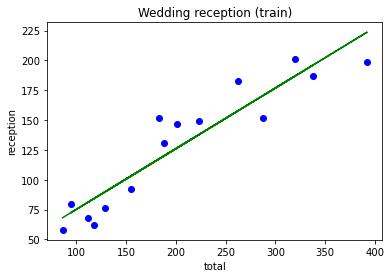

In [74]:
plt.scatter(total_train, reception_train, color='blue')
plt.plot(total_train, reg.predict(total_train), color='green')
plt.title('Wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

## 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

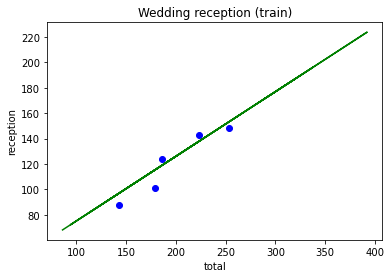

In [75]:
plt.scatter(total_test, reception_test, color='blue')
plt.plot(total_train, reg.predict(total_train), color='green')
plt.title('Wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

## 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [80]:
reg.score(total_train, reception_train)

0.8707088403321211

In [82]:
reg.score(total_test, reception_test)

0.8634953212566615

## 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [90]:
reg.predict([[300]])
print('결혼식 참석 인원 300명에 대한 예상 식수 인원은 %i명입니다.' %np.around(reg.predict([[300]])))

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177명입니다.
